### 1st Challenge
#### Case Study #1 - Danny's Diner
Find more info here: https://8weeksqlchallenge.com/case-study-1/

#### References and links "How to...":
- How to replace '\' with '/' in string: https://www.geeksforgeeks.org/python-string-replace/
- How to find the version of jupyter notebook from within the notebook: https://stackoverflow.com/questions/64323745/how-to-find-the-version-of-jupyter-notebook-from-within-the-notebook
- How to display multiple pandas tables: https://stackoverflow.com/questions/66525360/how-do-i-display-more-than-one-pandas-describe-output-in-a-single-jupyter-cell
- How to join two dataframes: https://stackoverflow.com/questions/41463119/join-two-dataframes-on-common-column-in-python
- How to aggregate group by a column: https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum
- How to count distinct values: https://stackoverflow.com/questions/43847520/how-to-get-the-distinct-count-of-values-in-a-python-pandas-dataframe
- How to join two tables with two common columns: https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
- GroupBy pandas DataFrame and select most common value: https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
- How to change column type to date: https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
- How to filter dataframe based on 2 values in the same column: https://stackoverflow.com/questions/59275119/how-can-i-filter-single-column-in-a-dataframe-on-multiple-values

- Good source for visualizing: https://www.data-to-viz.com/

#### Solved errors:
- SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape: https://stackoverflow.com/questions/37400974/error-unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3
- SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
- TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`: https://stackoverflow.com/questions/71623105/subtract-two-dates-in-python-when-addition-subtraction-of-integers-and-integer



In [243]:
# Check jupyter and python versions
from platform import python_version
print('python version: ', python_version())
!jupyter --version


python version:  3.9.13
Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : 7.6.5
jupyter_client   : 7.3.5
jupyter_core     : 4.11.1
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : 5.3.2
traitlets        : 5.1.1


### Imports

In [244]:
# Imports
import pandas as pd
from pandas.tseries.offsets import Day
import matplotlib.pyplot as plt
import seaborn as sns

# # Some settings
# # Display multiple pandas tables:
# %config InteractiveShell.ast_node_interactivity = 'all'
# pd.options.mode.chained_assignment = None  # default='warn'


### Obtain Dataset

In [245]:
# import tables
members_table = pd.read_csv(
    r'...\1st_Challenge\Datasets\members_table.csv')
menu_table = pd.read_csv(
    r'...\1st_Challenge\Datasets\menu_table.csv')
sales_table = pd.read_csv(
    r'...\1st_Challenge\Datasets\sales_table.csv')


In [246]:
members_table
menu_table
sales_table


,customer_id,join_date
0,A,2021-01-07
1,B,2021-01-09


,product_id,product_name,price
0,1,sushi,10
1,2,curry,15
2,3,ramen,12


,customer_id,order_date,product_id
0,A,2021-01-01,1
1,A,2021-01-01,2
2,A,2021-01-07,2
3,A,2021-01-10,3
4,A,2021-01-11,3
5,A,2021-01-11,3
6,B,2021-01-01,2
7,B,2021-01-02,2
8,B,2021-01-04,1
9,B,2021-01-11,1


In [247]:
# Join tables
merg1_df = pd.merge(sales_table, members_table, on='customer_id',  how='left')
merg2_df = pd.merge(merg1_df, menu_table, on='product_id',  how='left')
df = merg2_df
df
print('Dataset\'s shape: ', df.shape)
df[['order_date','join_date']]=df[['order_date','join_date']].apply(pd.to_datetime)
df.info()

,customer_id,order_date,product_id,join_date,product_name,price
0,A,2021-01-01,1,2021-01-07,sushi,10
1,A,2021-01-01,2,2021-01-07,curry,15
2,A,2021-01-07,2,2021-01-07,curry,15
3,A,2021-01-10,3,2021-01-07,ramen,12
4,A,2021-01-11,3,2021-01-07,ramen,12
5,A,2021-01-11,3,2021-01-07,ramen,12
6,B,2021-01-01,2,2021-01-09,curry,15
7,B,2021-01-02,2,2021-01-09,curry,15
8,B,2021-01-04,1,2021-01-09,sushi,10
9,B,2021-01-11,1,2021-01-09,sushi,10


Dataset's shape:  (15, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   15 non-null     object        
 1   order_date    15 non-null     datetime64[ns]
 2   product_id    15 non-null     int64         
 3   join_date     12 non-null     datetime64[ns]
 4   product_name  15 non-null     object        
 5   price         15 non-null     int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 840.0+ bytes


## Answers

##### 1. What is the total amount each customer spent at the restaurant?

,customer_id,price
0,A,76
1,B,74
2,C,36


<Figure size 400x400 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Amount spent by customer')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Amount Spent')

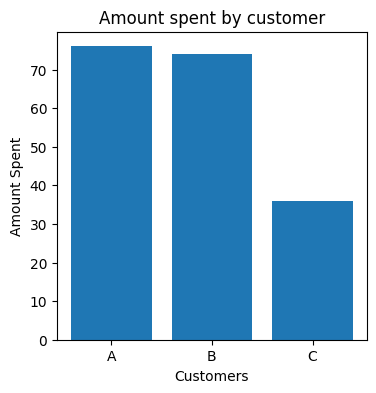

In [248]:
q1=df.groupby(['customer_id'])['price'].sum().reset_index()
q1
# Plot
plt.figure(figsize=(4, 4))
plt.bar(q1.customer_id,q1.price)
plt.title('Amount spent by customer')
plt.xlabel('Customers')
plt.ylabel('Amount Spent')
plt.show()


##### 2. How many days has each customer visited the restaurant?

,customer_id,order_date
0,A,4
1,B,6
2,C,2


<Figure size 400x400 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Count order days by customer')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Order days')

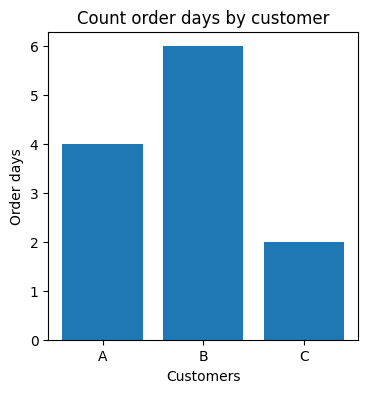

In [249]:
q2=df.groupby(['customer_id'])['order_date'].nunique().reset_index()
q2
# Plot
plt.figure(figsize=(4, 4))
plt.bar(q2.customer_id,q2.order_date)
plt.title('Count order days by customer')
plt.xlabel('Customers')
plt.ylabel('Order days')
plt.show()

##### 3. What was the first item from the menu purchased by each customer?

In [250]:
q3=df[['customer_id','order_date','product_name']]
q3_sub=q3.groupby('customer_id')['order_date'].min().reset_index()
q3=pd.merge(q3, q3_sub, how='right', on=['customer_id','order_date'])
q3

,customer_id,order_date,product_name
0,A,2021-01-01,sushi
1,A,2021-01-01,curry
2,B,2021-01-01,curry
3,C,2021-01-01,ramen
4,C,2021-01-01,ramen


##### 4. What is the most purchased item on the menu and how many times was it purchased by all customers?

In [251]:
# p1:What is the most purchased item on the menu?
q4_p1=df[['product_name']]
q4_p1=q4_p1.mode()
q4_p1

,product_name
0,ramen


,customer_id,product_name
0,A,3
1,B,2
2,C,3


<Figure size 400x400 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Times ordered "Ramen" (the popular item in the menue)')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Count orderes "Ramen"')

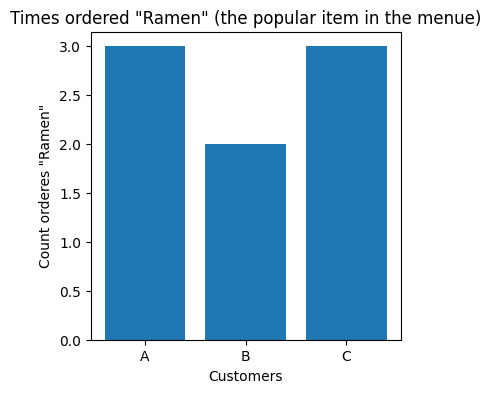

In [252]:
# p2: how many times was it purchased by all customers?
q4_p2=df[['customer_id','product_name']]
q4_p2=pd.merge(q4_p2, q4_p1, how='right', on=['product_name'])
q4_p2=q4_p2.groupby(['customer_id']).count().reset_index()
q4_p2
# Plot
plt.figure(figsize=(4, 4))
plt.bar(q4_p2.customer_id,q4_p2.product_name)
plt.title('Times ordered "Ramen" (the popular item in the menue)')
plt.xlabel('Customers')
plt.ylabel('Count orderes "Ramen"')
plt.show()

##### 5. Which item was the most popular for each customer?

In [253]:
q5=df[['customer_id','product_name','product_id']]
q5=q5.groupby('customer_id')['product_name'].apply(pd.Series.mode).reset_index()
q5

,customer_id,level_1,product_name
0,A,0,ramen
1,B,0,curry
2,B,1,ramen
3,B,2,sushi
4,C,0,ramen


##### 6. Which item was purchased first by the customer after they became a member?

In [254]:
# Copy
df1=df
# Adding new column to df based on two exist columns
def joined_column(row):
    if row['join_date']<=row['order_date']:
        return 'Y'
    else:
        return 'N'

df1['joined']=df1.apply (lambda row: joined_column(row), axis=1)

q6=df1[['customer_id','join_date','order_date','product_name','joined']]
q6=q6[q6['joined']=='Y']
# To find the multiple values as q3, but in this situation there are no multiple values.
q6_sub=q6.groupby(['customer_id'])['order_date'].min().reset_index()
q6=pd.merge(q6, q6_sub1, how='right', on=['customer_id','order_date'])
q6

,customer_id,join_date,order_date,product_name,joined
0,A,2021-01-07,2021-01-07,curry,Y
1,B,2021-01-09,2021-01-11,sushi,Y


##### 7. Which item was purchased just before the customer became a member?

In [255]:
q7=df1[['customer_id','join_date','order_date','product_name','joined']]
q7=q7[q7['joined']=='N']
# To find the multiple values as q3, but in this situation there are no multiple values.
q7_sub=q7.groupby(['customer_id'])['order_date'].max().reset_index()
q7=pd.merge(q7, q7_sub1, how='right', on=['customer_id','order_date'])
q7

,customer_id,join_date,order_date,product_name,joined
0,A,2021-01-07,2021-01-01,sushi,N
1,A,2021-01-07,2021-01-01,curry,N
2,B,2021-01-09,2021-01-04,sushi,N
3,C,NaT,2021-01-07,ramen,N


##### 8. What is the total items and amount spent for each member before they became a member?

,customer_id,count,sum
0,A,6,76
1,B,6,74
2,C,3,36


<Figure size 400x400 with 0 Axes>

Text(0.5, 1.0, ' Sum amount spent with count orders')

Text(0.5, 28.999999999999986, 'Amount spent')

Text(40.89908950617283, 0.5, 'Count orders')

<Figure size 400x400 with 0 Axes>

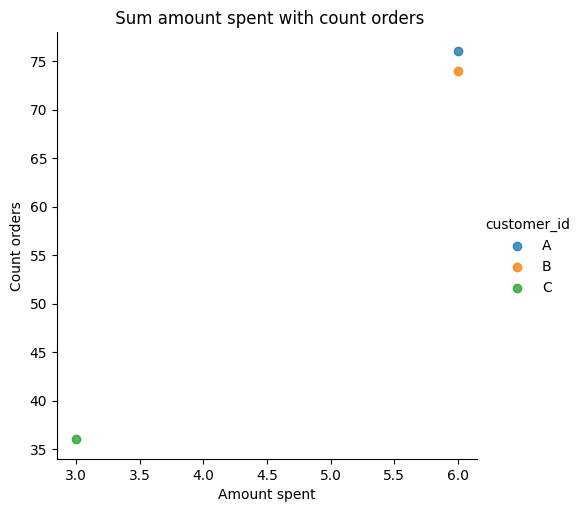

In [256]:
q8=df1[['customer_id','product_name','price','joined']]
q8=q8.groupby('customer_id').agg(count=('customer_id', 'count'), sum=('price', 'sum')).reset_index()
q8
# Plot
plt.figure(figsize=(4, 4))
sns.lmplot( x="count", y="sum", data=q8, fit_reg=False, hue='customer_id', legend=True)
plt.title(' Sum amount spent with count orders')
plt.xlabel('Amount spent')
plt.ylabel('Count orders')
plt.show()


##### 9. If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?

,customer_id,points
0,A,860
1,B,940
2,C,360


<Figure size 400x400 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Total points')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Sum points')

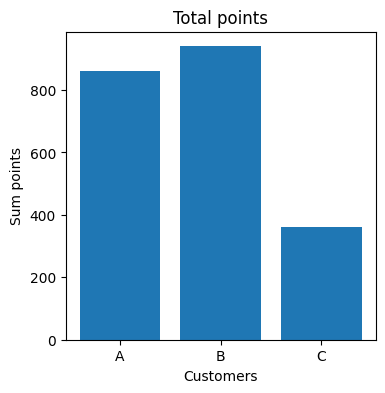

In [257]:
# Add new column name 'points'
def points_column(row):
    if row['product_name']=='sushi':
        return row['price']*20
    else:
        return row['price']*10

df1['points']=df1.apply (lambda row: points_column(row), axis=1)

q9=df1.groupby(['customer_id'])['points'].sum().reset_index()
q9
# Plot
plt.figure(figsize=(4, 4))
plt.bar(q9.customer_id,q9.points)
plt.title('Total points')
plt.xlabel('Customers')
plt.ylabel('Sum points')
plt.show()

##### 10. In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?

,customer_id,total_points
0,A,1370
1,B,1140


<Figure size 400x400 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.05, 'Total points')

Text(0.5, 1.05, 'With the first week bonus after join for the customers A and B')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Sum points')

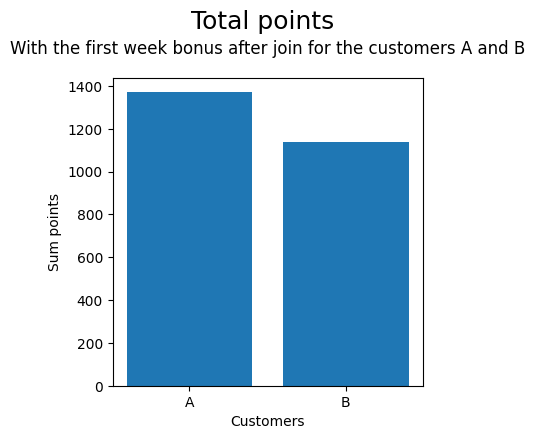

In [258]:
# Add new column because I could not aggregate two columns of type 'datetime64[ns]'
df1['delta'] = df1['order_date'].sub(df1['join_date']).mod(365*Day()).dt.days
def plus_points_column(row):
    if row['delta'] in range (0,6):
        return row['points']*2
    else:
        return row['points']

df1['1st_week_points']=df1.apply (lambda row: plus_points_column(row), axis=1)

q10=df1.groupby(['customer_id']).agg(total_points=('1st_week_points', 'sum')).reset_index()

q10=q10[q10['customer_id'].isin(['A','B'])]
q10
# Plot
plt.figure(figsize=(4, 4))
plt.bar(q10.customer_id,q10.total_points)
plt.suptitle('Total points', y=1.05, fontsize=18)
plt.title('With the first week bonus after join for the customers A and B', y=1.05)
plt.xlabel('Customers')
plt.ylabel('Sum points')
plt.show()
